In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df = df.iloc[:,0:2]#dropping last three columns
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

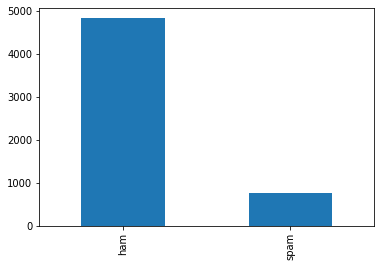

In [ ]:
df['v1'].value_counts().plot(kind='bar')

In [ ]:
#Recall and precision for imbalanced dataset

In [ ]:
x = df['v2']
y = df['v1']


In [ ]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

In [ ]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=32)

In [ ]:
import numpy as np
np.unique(y_test,return_counts=True)

(array(['ham', 'spam'], dtype=object), array([1213,  180]))

In [ ]:
x_test

2795    Tell your friends what you plan to do on Valen...
3677    Promotion Number: 8714714 - UR awarded a City ...
290                 Hey you told your name to gautham ah?
5169                             Now i'm going for lunch.
1253    Mum say we wan to go then go... Then she can s...
                              ...                        
2257              Here got lots of hair dresser fr china.
1937    The fact that you're cleaning shows you know w...
543       4 oclock at mine. Just to bash out a flat plan.
1233                   Lol ok. I'll snatch her purse too.
1150          (That said can you text him one more time?)
Name: v2, Length: 1393, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
v = CountVectorizer()
x_train = v.fit_transform(x_train)
x_test = v.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)


MultinomialNB()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
np.unique(y_pred,return_counts=True)

(array(['ham', 'spam'], dtype='<U4'), array([1224,  169]))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_pred,y_test)# TP FP
                               # FN TN

array([[1209,   15],
       [   4,  165]])

In [ ]:
accuracy_score(y_pred,y_test)*100

98.63603732950466

In [ ]:
from sklearn.metrics import precision_score,recall_score

In [ ]:
p_ham = precision_score(y_pred,y_test,pos_label='ham')

In [ ]:
p_spam = precision_score(y_pred,y_test,pos_label='spam')

In [ ]:
165/(165+15)

0.9166666666666666

In [ ]:
r_ham = recall_score(y_pred,y_test,pos_label='ham')

In [ ]:
1209/(1209+15)

0.9877450980392157

In [ ]:
r_spam = recall_score(y_pred,y_test,pos_label='spam')

In [ ]:
165/(165+4)

0.9763313609467456

In [ ]:
print(p_ham,p_spam,r_ham,r_spam)

0.9967023907666942 0.9166666666666666 0.9877450980392157 0.9763313609467456


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.99      0.99      1224
        spam       0.92      0.98      0.95       169

    accuracy                           0.99      1393
   macro avg       0.96      0.98      0.97      1393
weighted avg       0.99      0.99      0.99      1393

